In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams["font.size"]=14
matplotlib.rcParams["figure.figsize"]= (12,8)
matplotlib.rcParams["figure.facecolor"]="#00000000"

import seaborn as sns
sns.set_style("darkgrid")
sns.set(font="Verdana")
import plotly.express as px

In [2]:
pd.options.display.max_columns = 100

In [3]:
!ls

dag_extract.py    my_venv           study_df.ipynb
etl_extract.ipynb study_df.csv


In [4]:
study_df = pd.read_csv("study_df.csv")
study_df

,Rank,NCTId,OfficialTitle,StudyType,StartDate,CompletionDate,OverallStatus,LeadSponsorName,CollaboratorName,ResponsiblePartyType,ResponsiblePartyInvestigatorFullName,ResponsiblePartyInvestigatorAffiliation,LocationCountry,SeeAlsoLinkURL
0,1,NCT06055582,A Randomized Controlled Study to Compare Effec...,Interventional,"February 11, 2022","March 1, 2023",Completed,"Diabetes Foundation, India",Indian Council of Medical Research,Principal Investigator,Dr Anoop Misra,"Diabetes Foundation, India",India,NaN
1,2,NCT06055569,Efficacy of a Rehabilitation Treatment Using O...,Interventional,"November 1, 2023","March 31, 2026",Not yet recruiting,Fondazione Don Carlo Gnocchi Onlus,Istituto di Neuroscienze Consiglio Nazionale d...,Sponsor,NaN,NaN,NaN,NaN
2,3,NCT06055556,Partial Heart Transplantation for Severe Pedia...,Interventional,"September 15, 2023","December 30, 2030",Not yet recruiting,Duke University,NaN,Sponsor,NaN,NaN,NaN,NaN
3,4,NCT06055543,Impact of a New Plant-based High-energy Oral N...,Interventional,"August 9, 2023","May 31, 2024",Recruiting,Danone Specialized Nutrition,NaN,Sponsor,NaN,NaN,"Spain, Spain, Spain, Spain, Spain, Spain",NaN
4,5,NCT06055530,A Comprehensive Evaluation of an Artificial In...,Observational,October 2023,July 2024,Not yet recruiting,Enaiblers AB,"Jimma University, Ministry of Health, Uganda, ...",Sponsor,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467207,467208,NCT00000107,NaN,Observational,NaN,NaN,Completed,National Center for Research Resources (NCRR),NaN,NaN,NaN,NaN,United States,NaN
467208,467209,NCT00000106,NaN,Interventional,NaN,NaN,Unknown status,National Center for Research Resources (NCRR),NaN,NaN,NaN,NaN,United States,NaN
467209,467210,NCT00000105,Vaccination With Tetanus Toxoid and Keyhole Li...,Observational,July 2002,March 2012,Terminated,"Masonic Cancer Center, University of Minnesota",NaN,Sponsor,NaN,NaN,United States,NaN
467210,467211,NCT00000104,NaN,Observational,NaN,NaN,Completed,National Center for Research Resources (NCRR),HRSA/Maternal and Child Health Bureau,NaN,NaN,NaN,United States,NaN


In [5]:
study_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467212 entries, 0 to 467211
Data columns (total 14 columns):
 #   Column                                   Non-Null Count   Dtype 
---  ------                                   --------------   ----- 
 0   Rank                                     467212 non-null  int64 
 1   NCTId                                    467212 non-null  object
 2   OfficialTitle                            457209 non-null  object
 3   StudyType                                466342 non-null  object
 4   StartDate                                462101 non-null  object
 5   CompletionDate                           450306 non-null  object
 6   OverallStatus                            467212 non-null  object
 7   LeadSponsorName                          467212 non-null  object
 8   CollaboratorName                         153232 non-null  object
 9   ResponsiblePartyType                     422911 non-null  object
 10  ResponsiblePartyInvestigatorFullName     181

In [6]:
study_df.columns

Index(['Rank', 'NCTId', 'OfficialTitle', 'StudyType', 'StartDate',
       'CompletionDate', 'OverallStatus', 'LeadSponsorName',
       'CollaboratorName', 'ResponsiblePartyType',
       'ResponsiblePartyInvestigatorFullName',
       'ResponsiblePartyInvestigatorAffiliation', 'LocationCountry',
       'SeeAlsoLinkURL'],
      dtype='object')

In [7]:
study_df["StudyType"].nunique()

3

In [8]:
study_df["StudyType"].unique()

array(['Interventional', 'Observational', nan, 'Expanded Access'],
      dtype=object)

In [9]:
study_df["StudyType"].value_counts()

Interventional     359579
Observational      105852
Expanded Access       911
Name: StudyType, dtype: int64

In [60]:
study_type_df = study_df["StudyType"].value_counts().rename_axis('type').to_frame('counts')
study_type_df

,counts
type,
Interventional,359579
Observational,105852
Expanded Access,911


<AxesSubplot:ylabel='counts'>

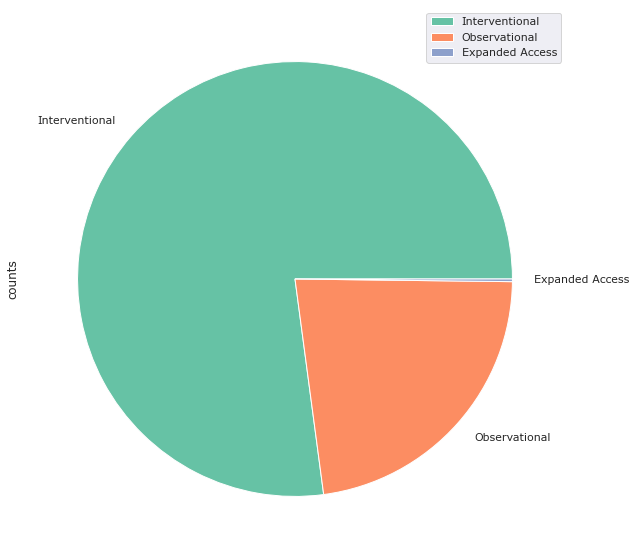

In [75]:
study_type_df.plot.pie(y='counts', figsize=(10, 10),colors=sns.color_palette('Set2'))

In [10]:
study_df["LeadSponsorName"].nunique()

40436

In [11]:
study_df["LeadSponsorName"].value_counts()

GlaxoSmithKline                               3466
National Cancer Institute (NCI)               3378
Assiut University                             3048
Pfizer                                        3005
AstraZeneca                                   2961
                                              ... 
Pingale, Vidya, OTR                              1
Sergiusz Nawrocki                                1
Aitor Vaquero Garrido                            1
EULIS Colloborative Research Working Group       1
Carol Weigel DiFranco                            1
Name: LeadSponsorName, Length: 40436, dtype: int64

In [12]:
sponsor_df = study_df["LeadSponsorName"].value_counts().rename_axis('sponsor_name').to_frame('counts')
sponsor_df

,counts
sponsor_name,
GlaxoSmithKline,3466
National Cancer Institute (NCI),3378
Assiut University,3048
Pfizer,3005
AstraZeneca,2961
...,...
"Pingale, Vidya, OTR",1
Sergiusz Nawrocki,1
Aitor Vaquero Garrido,1


In [13]:
sponsor_df.head(20)

,counts
sponsor_name,
GlaxoSmithKline,3466
National Cancer Institute (NCI),3378
Assiut University,3048
Pfizer,3005
AstraZeneca,2961
Assistance Publique - Hôpitaux de Paris,2840
Cairo University,2821
Mayo Clinic,2692
M.D. Anderson Cancer Center,2649


In [54]:
sponsor_df50 = sponsor_df.head(50)

In [55]:
matplotlib.rcParams["figure.figsize"]= (20,18)

Text(0, 0.5, '')

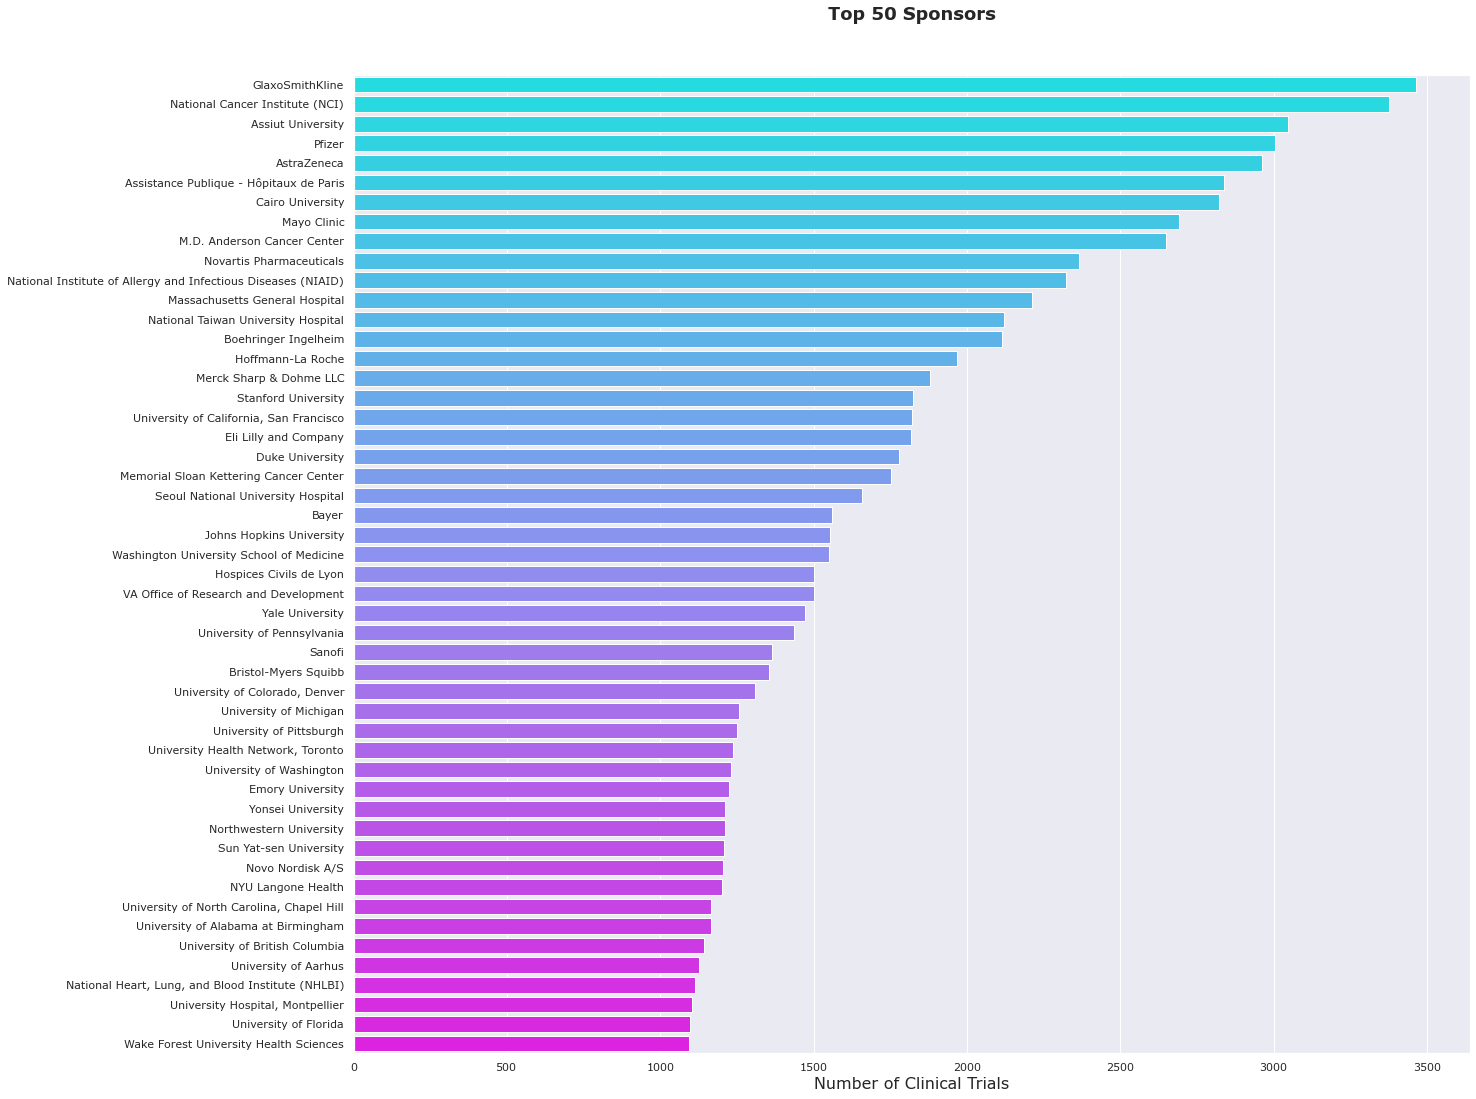

In [56]:
sponsor_50 = sns.barplot(y=sponsor_df50.index, x="counts",data=sponsor_df50, palette="cool")
sponsor_50.set_title("Top 50 Sponsors", y=1.05, fontdict= {'fontweight':'bold',"fontsize":18})
sponsor_50.set_xlabel("Number of Clinical Trials", fontsize=16)
sponsor_50.set_ylabel(None, fontsize=16)